CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


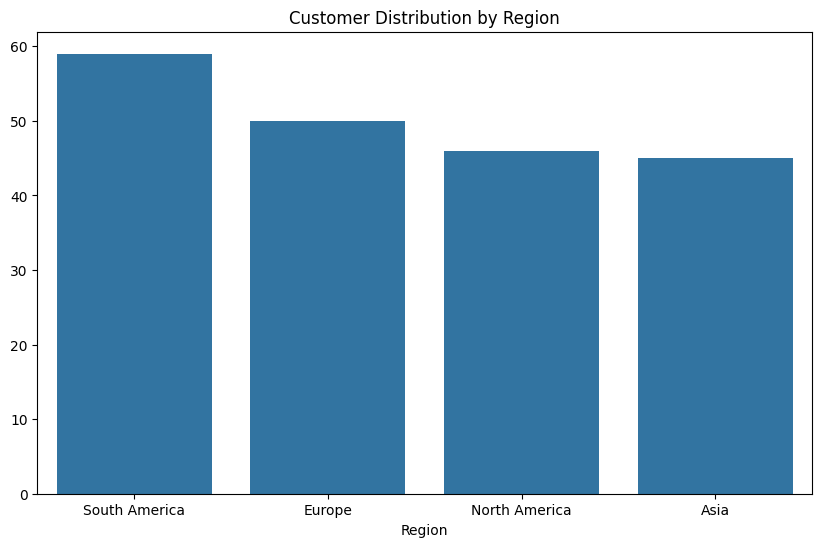

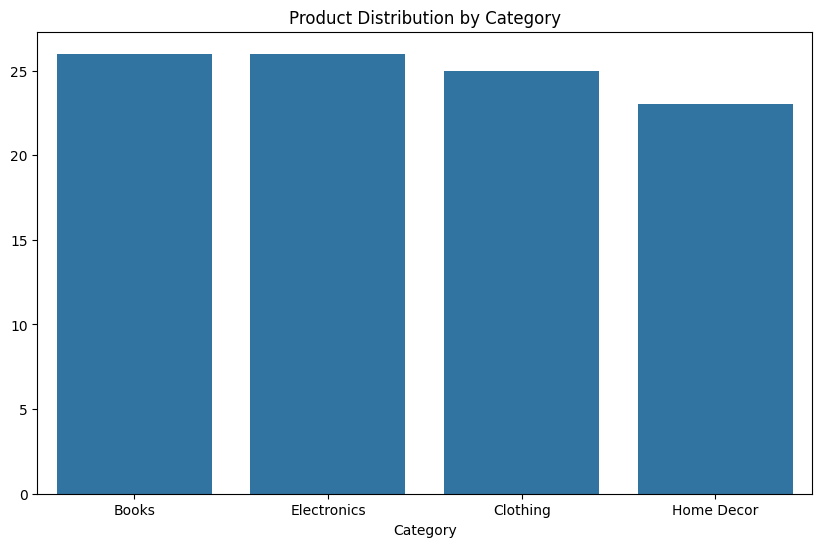

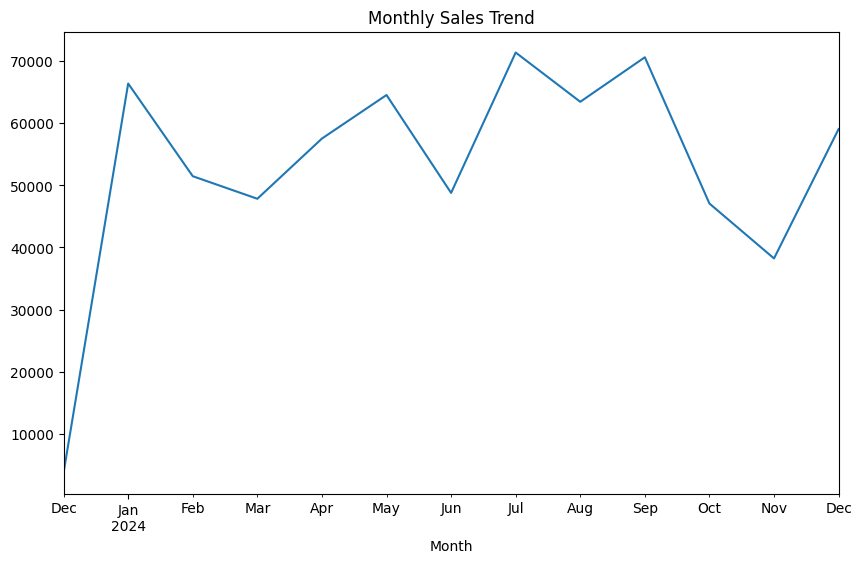

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Analyze customer distribution by region
region_distribution = customers['Region'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_distribution.index, y=region_distribution.values)
plt.title("Customer Distribution by Region")
plt.show()

# Analyze product distribution by category
category_distribution = products['Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values)
plt.title("Product Distribution by Category")
plt.show()

# Analyze transaction trends over time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.show()

In [8]:
# Import necessary libraries
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [9]:

# Merge customer and transaction data
customer_transactions = pd.merge(customers, transactions, on='CustomerID')
customer_profile = customer_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'ProductID': lambda x: x.mode()[0]  # Favorite product category
}).reset_index()

# Normalize features
scaler = StandardScaler()
customer_profile_scaled = scaler.fit_transform(customer_profile[['TotalValue', 'TransactionID']])

# Calculate similarity matrix
similarity_matrix = cosine_similarity(customer_profile_scaled)

# Get top 3 lookalikes for the first 20 customers
lookalike_map = {}
for i in range(20):
    customer_id = customer_profile.iloc[i]['CustomerID']
    similarities = similarity_matrix[i]
    top_3_indices = similarities.argsort()[-4:-1][::-1]  # Exclude self
    top_3_customers = customer_profile.iloc[top_3_indices]['CustomerID'].tolist()
    top_3_scores = similarities[top_3_indices].tolist()
    lookalike_map[customer_id] = list(zip(top_3_customers, top_3_scores))

# Save to CSV
import csv
with open('Lookalike.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['CustomerID', 'LookalikeID', 'SimilarityScore'])
    for cust_id, lookalikes in lookalike_map.items():
        for lookalike_id, score in lookalikes:
            writer.writerow([cust_id, lookalike_id, score])